In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np


In [18]:
# %conda install -y ipywidgets

In [19]:
import numpy as np
# from vae.arch_custommazelightk3conv1 import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [20]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')
from vae.arch_custommazelightk3conv1r1000 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1r1000.ckpt')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 5, 5, 32)     320         observation_input[0][0]          
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 800)          0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 16)           12816       flatten_1[0][0]                  
____________________________________________________________________________________________

/home/shun/miniconda3/envs/env_GDL4/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
# from tensorflow.keras.models import Model

In [22]:
# vae=load_model('./vae/')

In [23]:
DIR_NAME = './data/custom2dmaze_light1/'
file = os.listdir(DIR_NAME)[5]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

161858515.npz
(1000, 10, 10, 1)


In [24]:
# filelist = os.listdir(DIR_NAME)
# filelist = [x for x in filelist if x != '.DS_Store']
# filelist.sort()

In [25]:
# %conda install -y graphviz

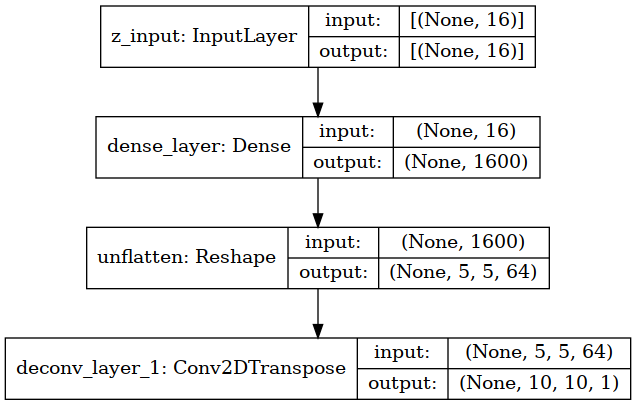

In [26]:
# plot_model(vae1.encoder, to_file='./vae/encoderconv1.png', show_shapes=True)
plot_model(vae1.decoder, to_file='./vae/decoderconv1.png', show_shapes=True)


In [27]:
layer_outputs = [layer.output for layer in vae1.encoder.layers[:2]]

In [28]:
from tensorflow.keras.models import Model

In [29]:
activation_model = Model(vae1.encoder.input, layer_outputs)
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
observation_input (InputLaye [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv_layer_1 (Conv2D)        (None, 5, 5, 32)          320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [30]:
# activations = activation_model.predict(np.array([obs]))[0][0][:,:,0]
# activations

In [31]:
# obs = obs_data3[364]
# activations = activation_model.predict(np.array([obs]))[0][0]
# # z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
# print(z_decoded1.shape)
# plt.subplot(121)
# plt.imshow( obs[:,:,0],cmap='gray')
# plt.subplot(122)
# plt.imshow( activations[:,:,0],cmap='gray')

In [32]:
# plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)

In [33]:
# vae1 = VAE()
# vae1.set_weights('./vae/weights_custommaze10000.1.ckpt')

In [34]:
file = os.listdir(DIR_NAME)[1]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
obs

array([[[0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [0.3529],
        [1.    ],
        [1.    ],
        [1.    ],
        [1.    ],
        [1.    ],
        [1.    ],
        [1.    ],
        [0.    ]],

       [[0.    ],
        [1.    ],
        [1.    ],
        [1.    ],
        [0.    ],
        [1.    ],
        [0.    ],
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [1.    ],
        [0.    ],
        [1.    ],
        [0.    ],
        [1.    ],
        [1.    ],
        [1.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [1.    ],
        [0.    ],
        [1.    ],
        [0.    ],
        [0.    ],
        [1.    ],
        [0.    ],
        [0.    ],
        [0.    ]],

       [[0.    ],
        [1.    ],
        [0.    ],
        [1.    ],
        [1.    ],


In [35]:
from vae.arch_custommazelightk3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1.ckpt')

ModuleNotFoundError: No module named 'vae.arch_custommazelightk3conv1'

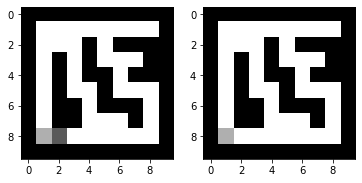

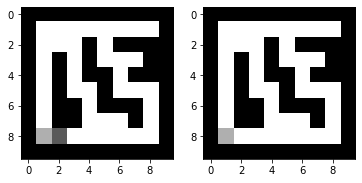

In [ ]:
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

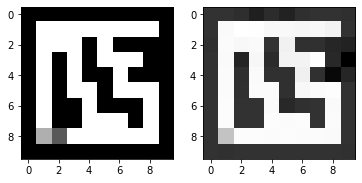

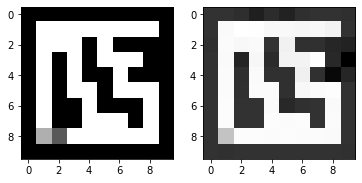

In [ ]:
from vae.arch_custommazelightk3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.5z16k3conv1.ckpt')

file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0],cmap='gray')
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0],cmap='gray')
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [ ]:
print(z_decoded1.shape)

(10, 10, 1)


In [ ]:
# vae2 = VAE()
# vae2.set_weights('./vae/weights1.1rand3.ckpt')

In [ ]:
np.array([obs]).shape

(1, 10, 10, 1)

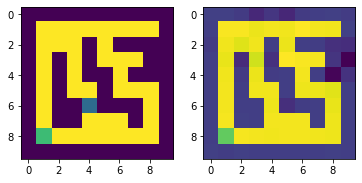

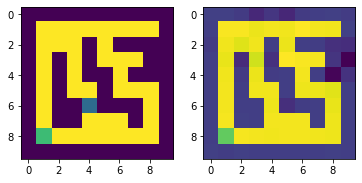

In [ ]:
file = os.listdir(DIR_NAME)[19]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[90]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [ ]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights1.1rand3.ckpt')

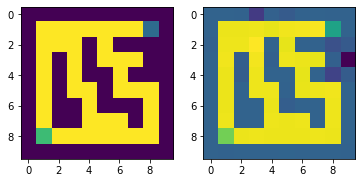

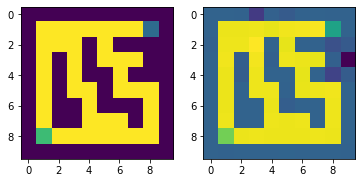

In [ ]:

obs = obs_data3[0]
z_decoded = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
# vae3 = VAE()
# vae3.set_weights('./vae/weights200.20804.h5')

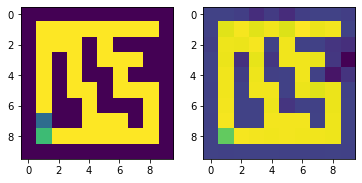

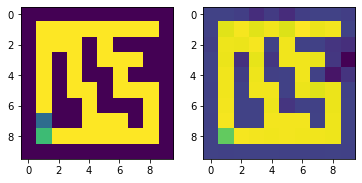

In [ ]:
from vae.arch_custommazelightk3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.5z16k3conv1.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


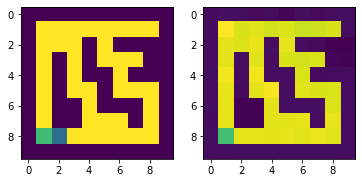

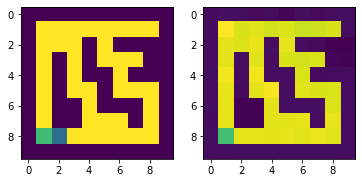

In [ ]:
from vae.arch_custommazelightk2conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k2conv1.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


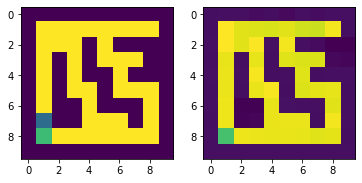

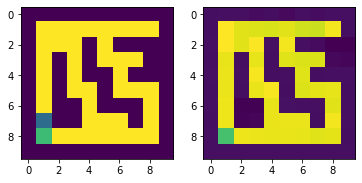

In [ ]:
from vae.arch_custommazelightk2conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k2conv1.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


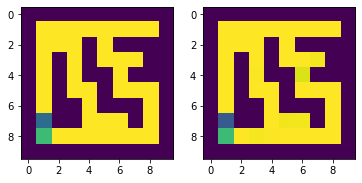

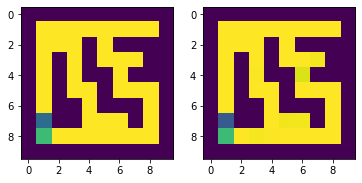

In [ ]:
from vae.arch_custommazelightz16k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


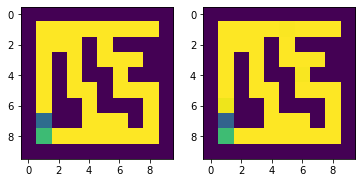

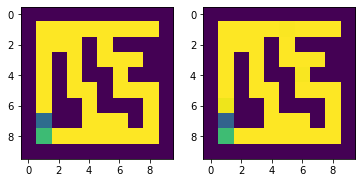

In [ ]:
from vae.arch_custommazelightz16k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
# filelist = os.listdir('./vae/decoded1')
# filelist = [x for x in filelist if (x != '.DS_Store' and x!='.gitignore')]
# # filelist.sort()
# length_filelist = len(filelist)
# sorted_names = sorted(filelist, key=lambda name: int(''.join(filter(str.isdigit, name))))

In [ ]:
import time

In [ ]:
# im_datas=[]
# for i in range(300):
#     im_data = np.load(f'./vae/decoded1/{sorted_names[i]}')
    
#     im_datas.append(im_data['z_decoded1_array'])
    
#     plt.gca().cla() 
#     plt.imshow(im_datas[i])
    
    
#     time.sleep(0.3)
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 
    
#     print(i)

In [ ]:
# ### output from the full_model
# DIR_NAME = './data/custom2dmaze_rollout3/'
# file = os.listdir(DIR_NAME)[17]#あるエピソード取り出す
# obs_data = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データをとりだす(300,64,64,3)

# obs = obs_data[4]#1ステップ時間の観測(1,64,64,3)

# reconstruction = vae1.full_model.predict(np.array([obs]))[0]

# ax1 = plt.subplot(121)
# plt.imshow( obs[:,:,0])
# ax1.axis('off')
# ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
#          transform=ax1.transAxes)

# ax2 = plt.subplot(122)
# plt.imshow( reconstruction)
# ax2.axis('off')
# ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
#          transform=ax2.transAxes);


In [ ]:
np.array([obs]).shape

(1, 10, 10, 1)

In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae1.encoder.predict(np.array([obs]))
print("z = " + str(encoded_z))

mu = [ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
  0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]
log_var = [-6.3814 -0.1221 -5.4728 -2.3143 -3.975  -0.0906 -4.2963 -2.8338 -4.6669
 -0.0439 -4.8477 -1.7186 -0.4689 -0.9855 -0.7203 -1.8126]
z = [array([[ 1.3428,  0.0914,  0.5608,  0.3766,  0.3148, -0.0702, -0.147 ,
         0.5393,  0.0145,  0.1175,  3.7114, -0.849 ,  0.2337,  0.5083,
        -0.6734,  0.1429]], dtype=float32), array([[-6.3814, -0.1221, -5.4728, -2.3143, -3.975 , -0.0906, -4.2963,
        -2.8338, -4.6669, -0.0439, -4.8477, -1.7186, -0.4689, -0.9855,
        -0.7203, -1.8126]], dtype=float32), array([[ 1.3906, -0.2778,  0.6492,  0.5   ,  0.5928, -0.3425, -0.1441,
        -0.1906,  0.0191,  0.8516,  3.6921, -1.2889, -0.0884, -0.1226,
        -1.3037, -0.4383]], dtype=float32)]


In [ ]:
print(vae1.encoder.predict(np.array([obs])))

[array([[ 0.0319,  0.0294, -0.0539,  0.0344,  0.1053,  0.0566,  0.0282,
         0.2165,  0.1577, -0.1731, -0.2321,  0.16  , -0.024 , -0.1063,
        -0.1269,  0.0903]], dtype=float32), array([[-3.2697, -3.1606, -3.7377, -2.7188, -3.6225, -3.2271, -3.5068,
        -4.1458, -3.1249, -3.1219, -3.2521, -3.3721, -3.288 , -3.2479,
        -3.2231, -3.2861]], dtype=float32), array([[-0.077 ,  0.1803, -0.0725, -0.3347,  0.1524,  0.2548, -0.0256,
         0.173 ,  0.3691, -0.1643, -0.022 ,  0.1391,  0.367 , -0.2852,
         0.0074,  0.2192]], dtype=float32)]


In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

z = [[-0.3245  1.0891 -0.8748  1.1673  0.241   0.5457  0.8483 -1.0848 -0.0253
   1.2353 -1.286  -0.9962  0.5554 -0.8761  2.1387 -0.5731]]


informative dimensions:


array([ 0,  1,  2,  3,  4,  6,  7,  8, 10, 11, 12, 13, 14, 15])

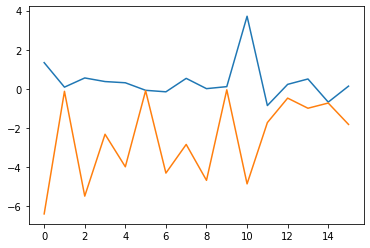

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

informative dimensions:


array([ 0,  2,  3,  4,  6,  7,  8, 10])

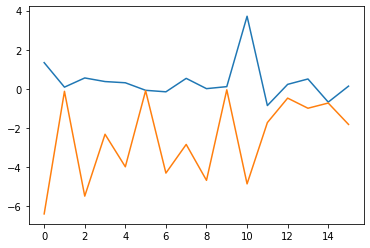

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 2)[0]
hot_zs

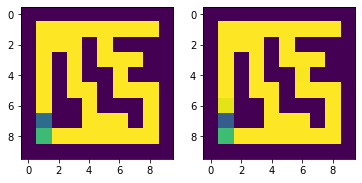

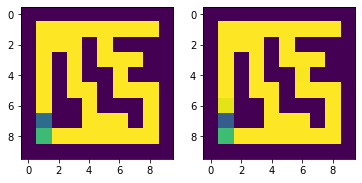

In [ ]:
from vae.arch_custommazelightz16k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

z = [[-0.4844 -0.9026 -0.8873  1.0536  0.1799  0.5102  0.6712 -0.3427 -0.1166
  -0.7356 -0.8364 -1.0462  0.9211 -1.1817  0.0806 -0.5909]]


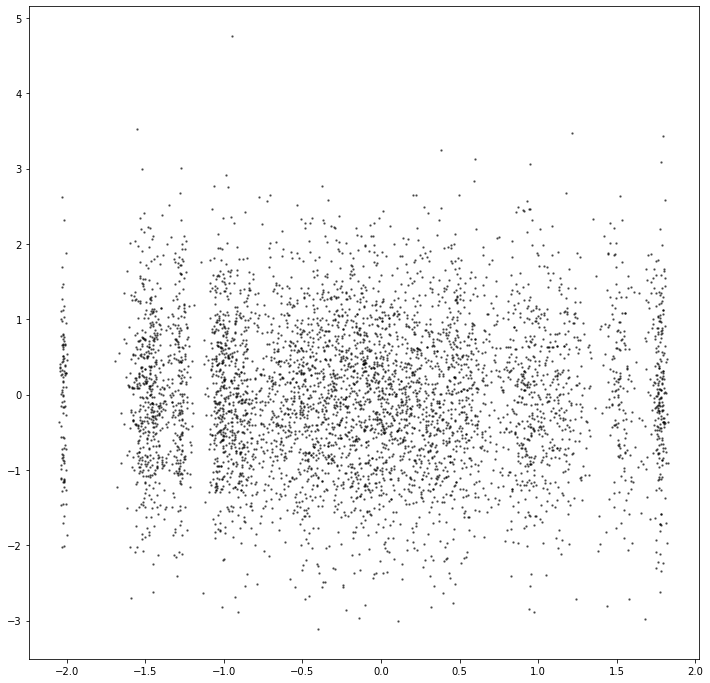

In [ ]:
n_to_show = 5000
figsize = 12
index1=4
index2=9

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data3[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[ 1.3071 -1.7674  0.5594  0.4724  0.4112  0.4183 -0.1079 -0.0192  0.1141
   0.2362  3.8204 -0.732   0.5402 -0.2039 -0.7865  0.6288]
 [ 1.3071 -1.7674  0.5594  0.4724  0.4112  0.4183 -0.1079 -0.0192  0.1141
   0.2362  3.8204 -0.732   0.5402 -0.2039 -0.7865  0.6288]
 [ 1.3071 -1.7674  0.5594  0.4724  0.4112  0.4183 -0.1079 -0.0192  0.1141
   0.2362  3.8204 -0.732   0.5402 -0.2039 -0.7865  0.6288]
 [ 1.3071 -1.7674  0.5594  0.4724  0.4112  0.4183 -0.1079 -0.0192  0.1141
   0.2362  3.8204 -0.732   0.5402 -0.2039 -0.7865  0.6288]
 [ 1.3071 -1.7674  0.5594  0.4724  0.4112  0.4183 -0.1079 -0.0192  0.1141
   0.2362  3.8204 -0.732   0.5402 -0.2039 -0.7865  0.6288]
 [ 1.3071 -1.7674  0.5594  0.4724  0.4112  0.4183 -0.1079 -0.0192  0.1141
   0.2362  3.8204 -0.732   0.5402 -0.2039 -0.7865  0.6288]
 [ 1.3071 -1.7674  0.5594  0.4724  0.4112  0.4183 -0.1079 -0.0192  0.1141
   0.2362  3.8204 -0.732   0.5402 -0.2039 -0.7865  0.6288]]


In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[0]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
   0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]
 [ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
   0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]
 [ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
   0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]
 [ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
   0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]
 [ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
   0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]
 [ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
   0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]
 [ 1.3428  0.0914  0.5608  0.3766  0.3148 -0.0702 -0.147   0.5393  0.0145
   0.1175  3.7114 -0.849   0.2337  0.5083 -0.6734  0.1429]]


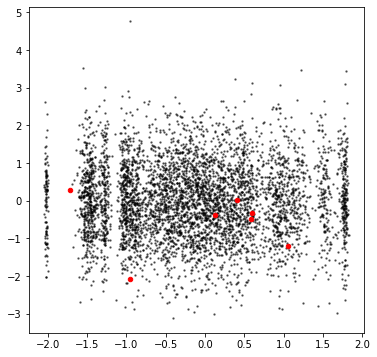

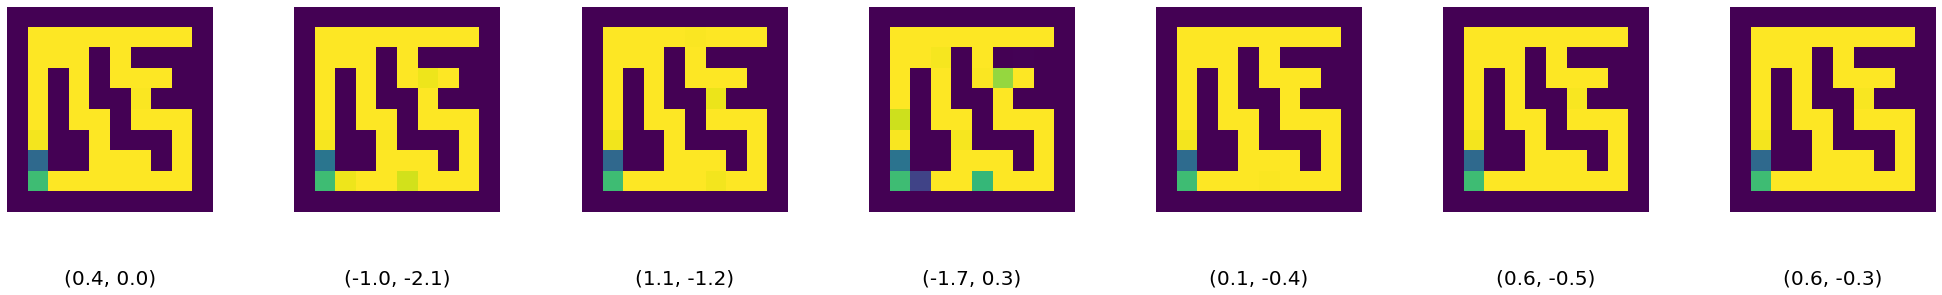

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

In [ ]:
# figsize = 6
# plt.figure(figsize=(figsize, figsize))
# plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


# grid_size = 10
# grid_depth = 1
# figsize = 6
# figsize1 = 50
# batchsize = 7
# # z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# # z_grid = 
# encoded_z[:,index1] = np.random.normal()
# encoded_z[:,index2] = np.random.normal()
# # x = np.random.normal(size = grid_size * grid_depth)
# # y = np.random.normal(size = grid_size * grid_depth)

# # z_grid = np.array(list(zip(x, y)))
# # reconst = vae1.decoder.predict(z_grid)
# reconst = vae1.decoder.predict(encoded_z)
# plt.scatter(z_grid[:, index1] , z_grid[:, index2], c = 'red', alpha=1, s=20)
# plt.show()

# fig = plt.figure(figsize=(figsize1, 30))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

# for i in range(batchsize):
#     ax = fig.add_subplot(grid_depth, grid_size, i+1)
#     ax.axis('off')
#     ax.text(0.5, -0.35, str((np.round(z_grid[0,index1],1),np.round(z_grid[0,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
#     ax.imshow(reconst[0, :,:,0])

In [ ]:
from vae.arch_custommazelightz16k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1.ckpt')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
conv_layer_1 (Conv2D)           (None, 5, 5, 2)      20          observation_input[0][0]          
__________________________________________________________________________________________________
flatten_118 (Flatten)           (None, 50)           0           conv_layer_1[0][0]               
__________________________________________________________________________________________________
mu (Dense)                      (None, 16)           816         flatten_118[0][0]                
____________________________________________________________________________________________

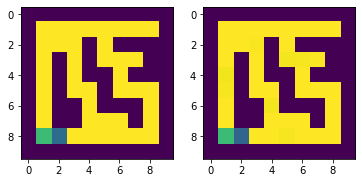

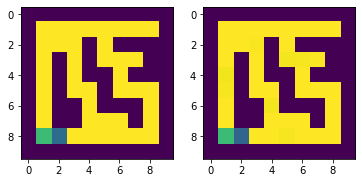

In [ ]:
from vae.arch_custommazelightz16k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z16k3conv1r100000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))


mu = [ 0.6849  0.024   0.7155 -0.1155 -1.5358 -0.0244 -0.4964  0.3757  0.2044
 -0.0361 -0.905  -0.0079  0.0143 -0.8957  0.2748 -0.1183]
log_var = [-5.9773 -0.095  -6.2608 -3.3375 -7.5908 -0.1084 -4.6284 -3.2672 -5.1911
 -0.066   0.3169 -0.1498 -0.2088 -3.2802 -0.568  -2.3948]


In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

z = [[ 0.7998  0.7298  0.7188  0.2196 -1.5575 -0.9922 -0.6132  0.5289  0.2621
   0.5032 -0.1234 -1.0334 -1.0934 -1.2556  0.9743  0.148 ]]


informative dimensions:


array([ 0,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15])

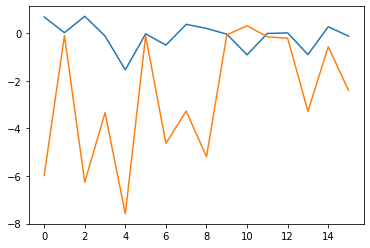

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

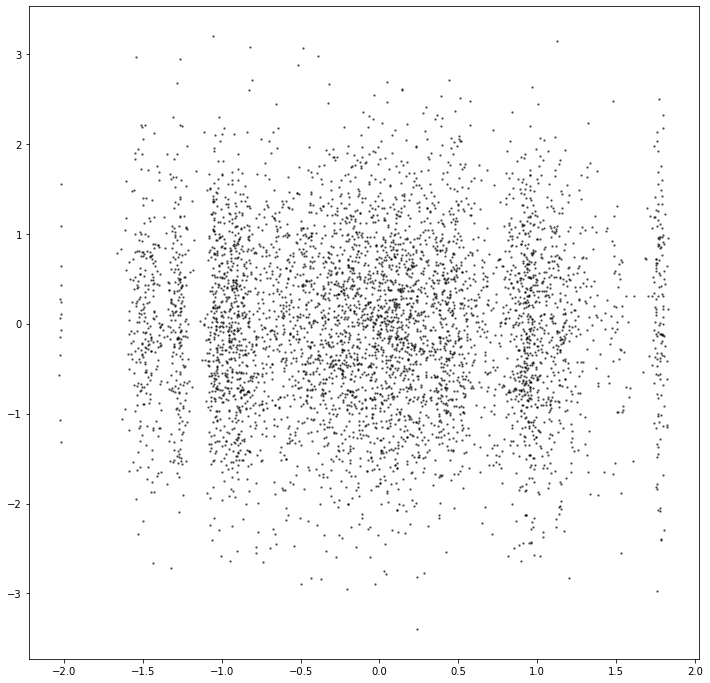

In [ ]:
n_to_show = 5000
figsize = 12
index1=4
index2=9

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data3[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[ 0.5857 -1.129   0.7328  0.1109 -1.4913  0.0133 -0.423   0.4832  0.2694
   0.4337 -2.4181  0.6581  1.0407 -0.9037 -0.4852 -0.3445]
 [ 0.5857 -1.129   0.7328  0.1109 -1.4913  0.0133 -0.423   0.4832  0.2694
   0.4337 -2.4181  0.6581  1.0407 -0.9037 -0.4852 -0.3445]
 [ 0.5857 -1.129   0.7328  0.1109 -1.4913  0.0133 -0.423   0.4832  0.2694
   0.4337 -2.4181  0.6581  1.0407 -0.9037 -0.4852 -0.3445]
 [ 0.5857 -1.129   0.7328  0.1109 -1.4913  0.0133 -0.423   0.4832  0.2694
   0.4337 -2.4181  0.6581  1.0407 -0.9037 -0.4852 -0.3445]
 [ 0.5857 -1.129   0.7328  0.1109 -1.4913  0.0133 -0.423   0.4832  0.2694
   0.4337 -2.4181  0.6581  1.0407 -0.9037 -0.4852 -0.3445]
 [ 0.5857 -1.129   0.7328  0.1109 -1.4913  0.0133 -0.423   0.4832  0.2694
   0.4337 -2.4181  0.6581  1.0407 -0.9037 -0.4852 -0.3445]
 [ 0.5857 -1.129   0.7328  0.1109 -1.4913  0.0133 -0.423   0.4832  0.2694
   0.4337 -2.4181  0.6581  1.0407 -0.9037 -0.4852 -0.3445]]


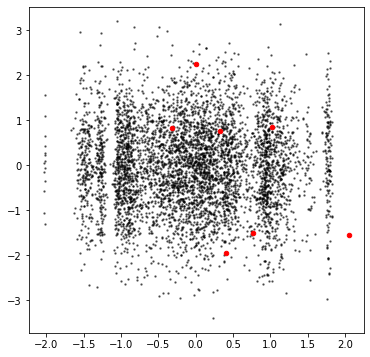

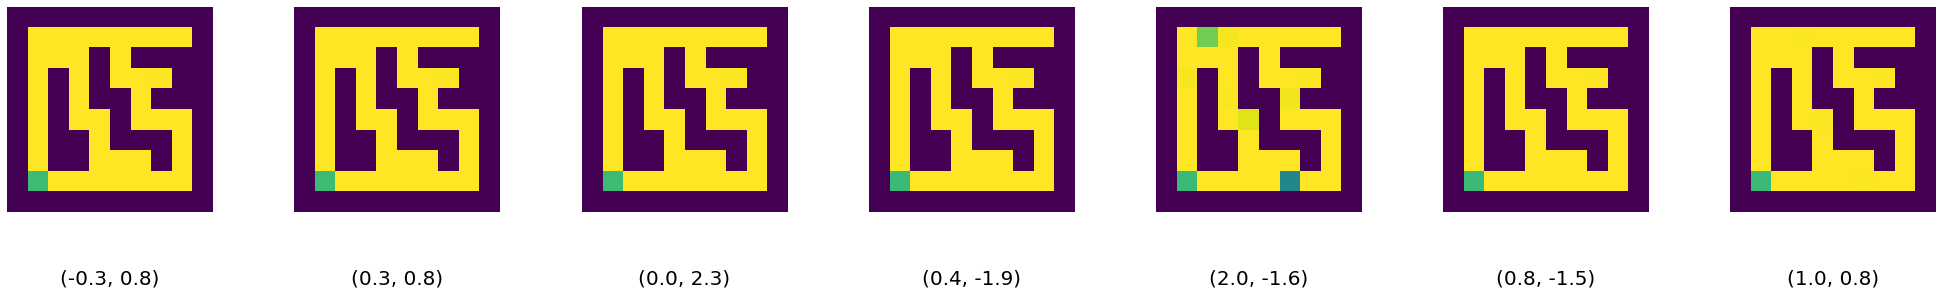

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

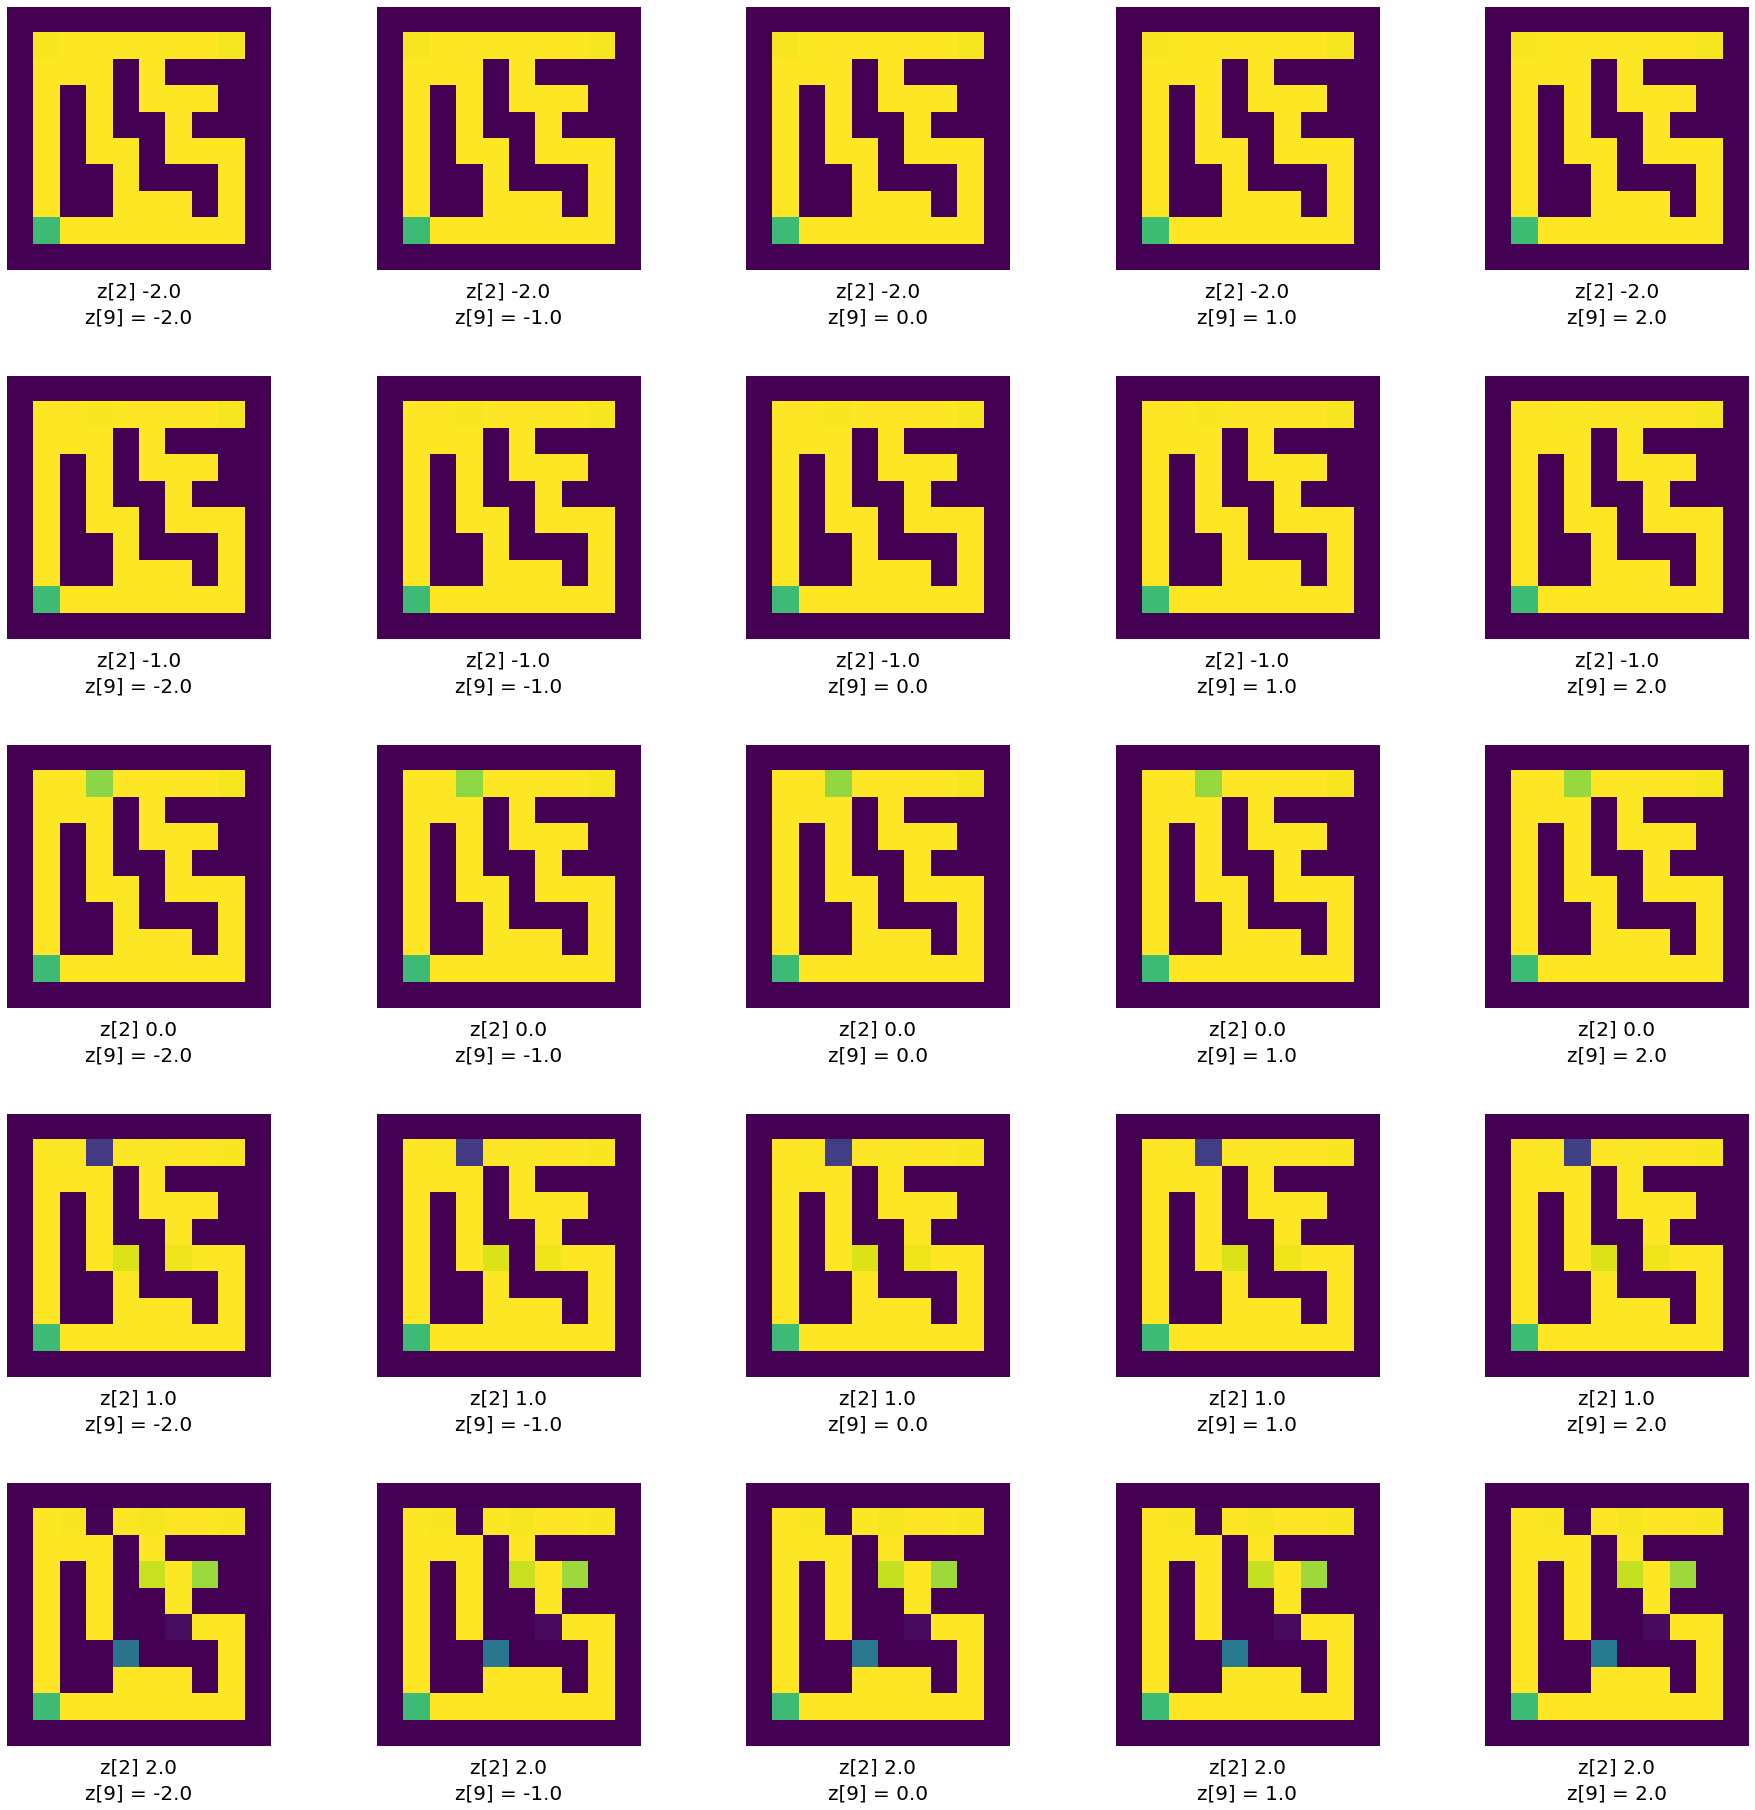

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[9] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[9] = ' + str(np.round(z[9],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [ ]:
a=vae1.encoder.predict(np.array([obs_data1[20]]))[0]
a.shape

(1, 16)

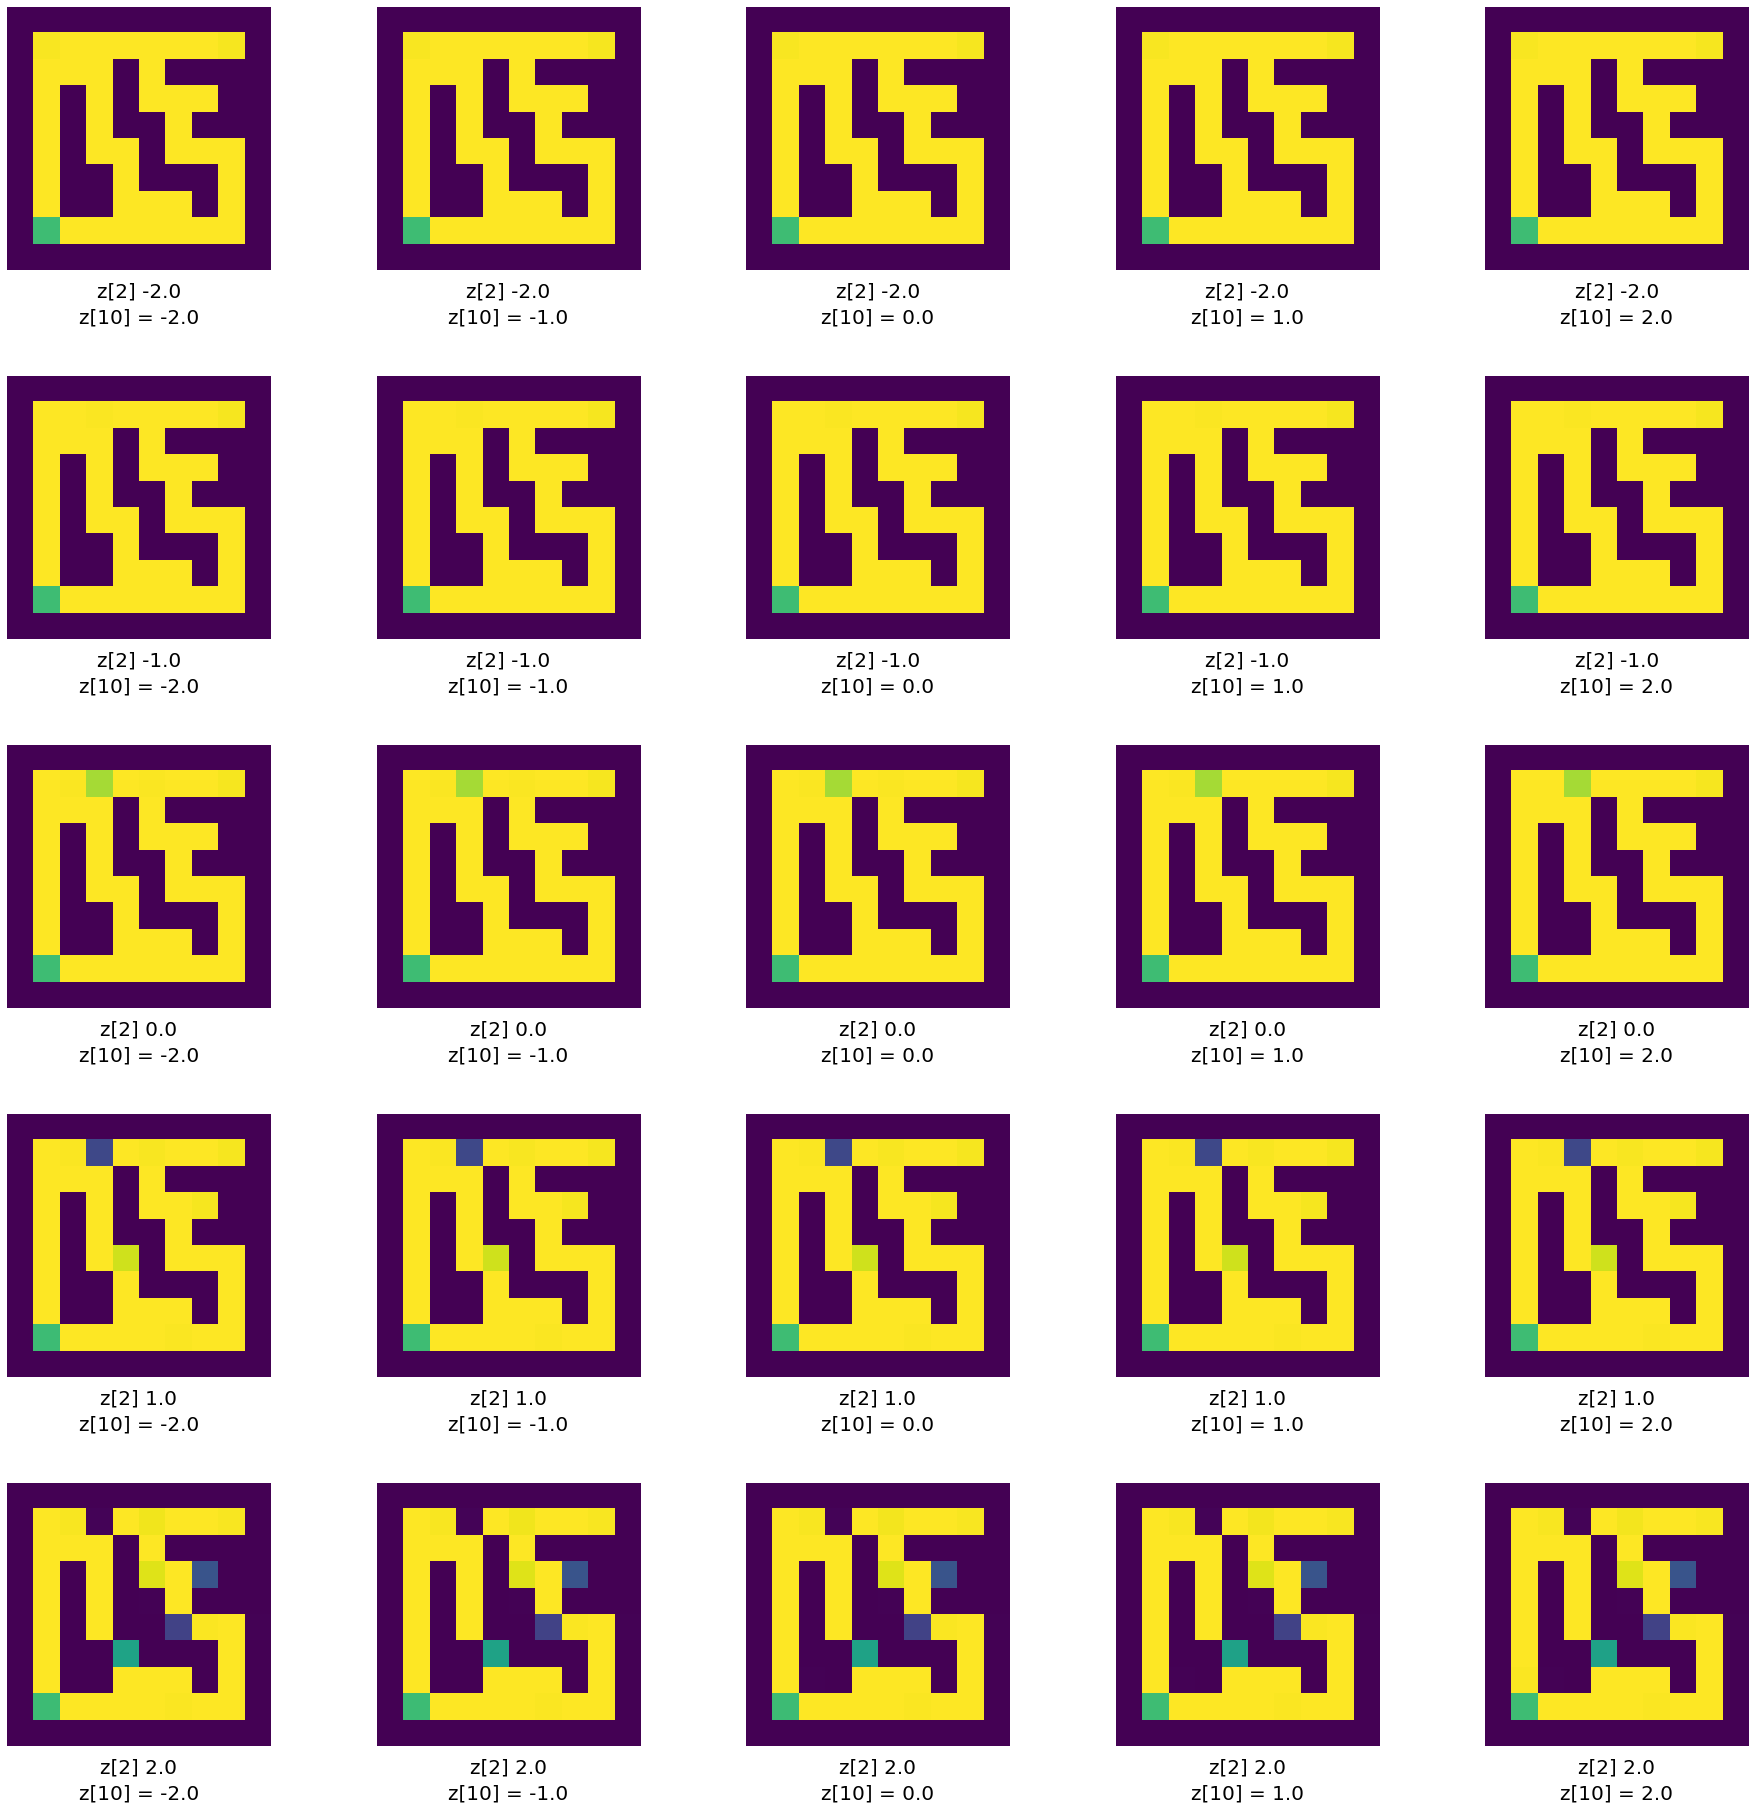

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [ ]:
decoded_obs

array([[[0.5002, 0.4998, 0.4999],
        [0.4998, 0.4996, 0.4999],
        [0.4997, 0.4998, 0.5004],
        ...,
        [0.5004, 0.5001, 0.5001],
        [0.5005, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.4998]],

       [[0.5003, 0.4999, 0.5002],
        [0.5001, 0.5002, 0.4997],
        [0.5   , 0.4998, 0.4998],
        ...,
        [0.5003, 0.5   , 0.4998],
        [0.5002, 0.5002, 0.5003],
        [0.4999, 0.5   , 0.4998]],

       [[0.5001, 0.4999, 0.5001],
        [0.4998, 0.4996, 0.5   ],
        [0.5002, 0.4996, 0.5   ],
        ...,
        [0.4998, 0.5005, 0.5   ],
        [0.5001, 0.5004, 0.4999],
        [0.4999, 0.4997, 0.5002]],

       ...,

       [[0.4996, 0.5003, 0.5003],
        [0.4998, 0.5001, 0.499 ],
        [0.4998, 0.5003, 0.5006],
        ...,
        [0.5006, 0.4993, 0.4987],
        [0.5002, 0.5013, 0.5008],
        [0.5001, 0.5001, 0.4993]],

       [[0.5004, 0.4993, 0.4997],
        [0.4996, 0.5   , 0.4994],
        [0.5009, 0.4992, 0.5004],
        .

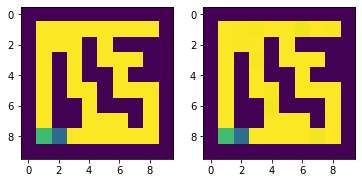

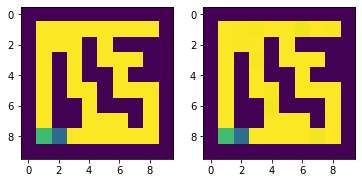

In [ ]:
from vae.arch_custommazelightz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z32k3conv1.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


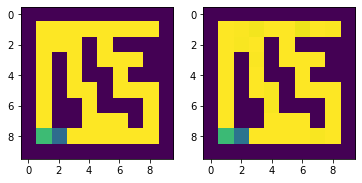

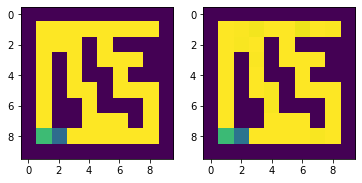

In [ ]:
from vae.arch_custommazelightz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z32k3conv1.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 


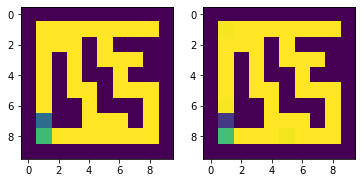

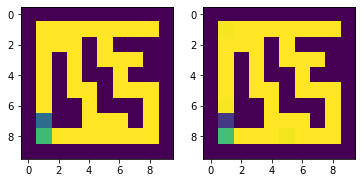

In [ ]:
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))


mu = [ 0.7348 -0.0838  1.059  -0.0522 -0.1055 -1.5791  1.2644  0.0358  0.1471
 -0.0192  0.6242  1.2081  0.4514  0.451   0.4829  0.9114 -1.1054 -0.7146
 -0.1808  0.9053  1.1626  0.1452  1.2564 -1.5909 -0.9394  0.0735 -0.9951
  1.1648 -0.0966  1.5378 -1.0422  1.6749]
log_var = [-0.3956 -0.0492 -0.9194 -2.983  -3.4512 -1.7188 -1.2161 -5.0904 -0.1248
 -4.6398 -0.4652 -1.0906 -1.929  -0.2047 -3.5918 -4.3984 -0.8921 -0.517
 -0.093  -0.8602 -0.8884 -0.1214 -1.1295 -5.7034 -0.752  -0.0333 -0.8441
 -1.1855 -0.0331 -1.5666 -4.3708 -1.782 ]


In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

z = [[ 0.7827  0.1738  1.2895 -0.1601 -0.2297 -1.9481  0.6989  0.0391 -1.2016
  -0.0021  0.4133  1.4482  0.5684  1.3882  0.3832  0.8347 -0.1748 -0.5854
   1.0249  1.7761  1.4808  0.4237  1.6492 -1.6873 -1.2707 -0.8565 -1.6502
   1.7682 -0.0894  1.0922 -1.0919  1.2922]]


informative dimensions:


array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31])

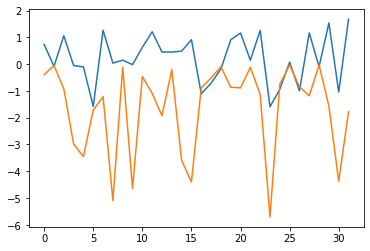

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

informative dimensions:


array([ 3,  4,  7,  9, 14, 15, 23, 30])

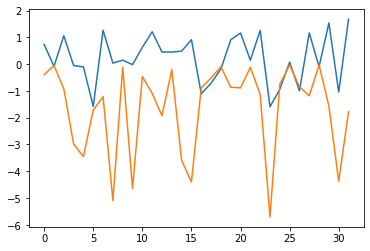

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 2)[0]
hot_zs1


In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

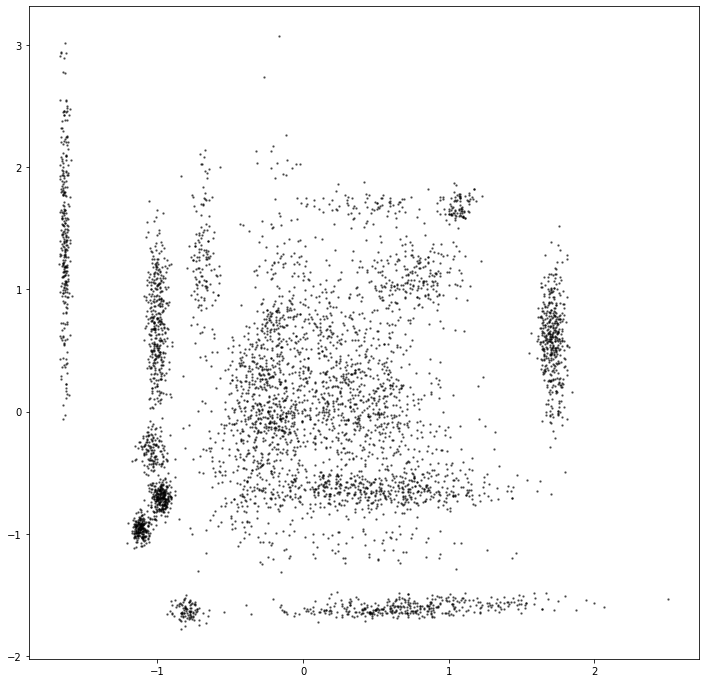

In [ ]:
n_to_show = 5000
figsize = 12
index1=4
index2=9

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data3[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[ 1.0578  0.2959  0.5622 -0.1784 -0.0817 -1.1158  1.5043 -0.0208  0.547
  -0.0805 -0.5269  1.1099 -0.3029  0.2881  0.4917  1.062  -0.5033 -0.8587
  -1.2455  1.1725  1.2947  1.4315  1.2335 -1.5663 -1.0777  0.1186 -0.6576
   1.1485  0.5345  1.5209 -0.9552  1.719 ]
 [ 1.0578  0.2959  0.5622 -0.1784 -0.0817 -1.1158  1.5043 -0.0208  0.547
  -0.0805 -0.5269  1.1099 -0.3029  0.2881  0.4917  1.062  -0.5033 -0.8587
  -1.2455  1.1725  1.2947  1.4315  1.2335 -1.5663 -1.0777  0.1186 -0.6576
   1.1485  0.5345  1.5209 -0.9552  1.719 ]
 [ 1.0578  0.2959  0.5622 -0.1784 -0.0817 -1.1158  1.5043 -0.0208  0.547
  -0.0805 -0.5269  1.1099 -0.3029  0.2881  0.4917  1.062  -0.5033 -0.8587
  -1.2455  1.1725  1.2947  1.4315  1.2335 -1.5663 -1.0777  0.1186 -0.6576
   1.1485  0.5345  1.5209 -0.9552  1.719 ]
 [ 1.0578  0.2959  0.5622 -0.1784 -0.0817 -1.1158  1.5043 -0.0208  0.547
  -0.0805 -0.5269  1.1099 -0.3029  0.2881  0.4917  1.062  -0.5033 -0.8587
  -1.2455  1.1725  1.2947  1.4315  1.2335 -1.5663 -1.0777

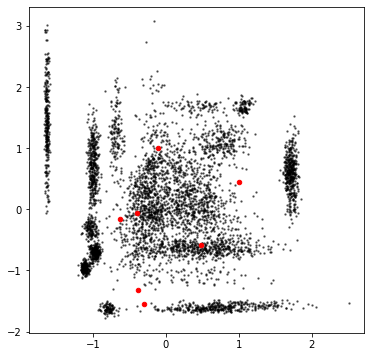

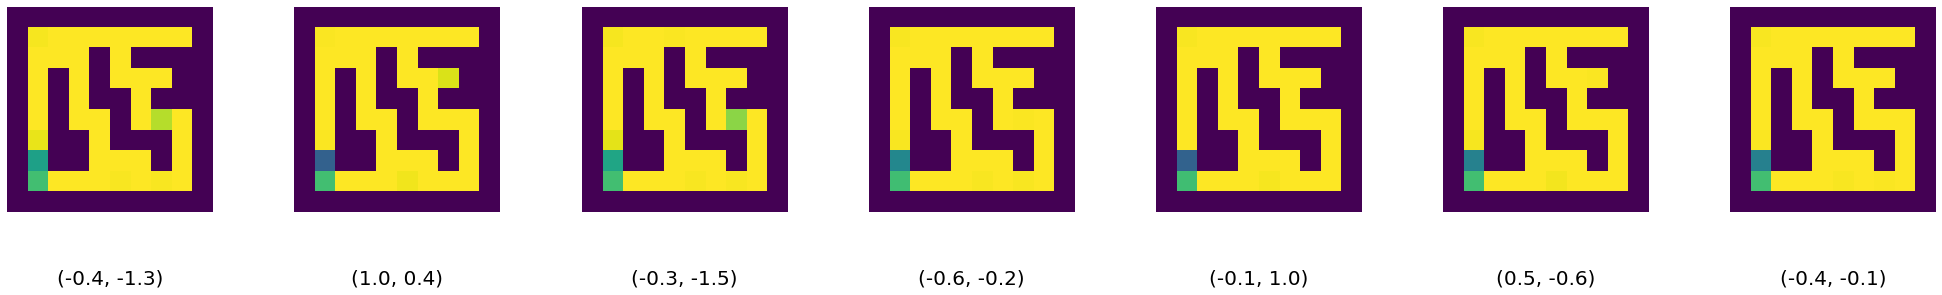

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

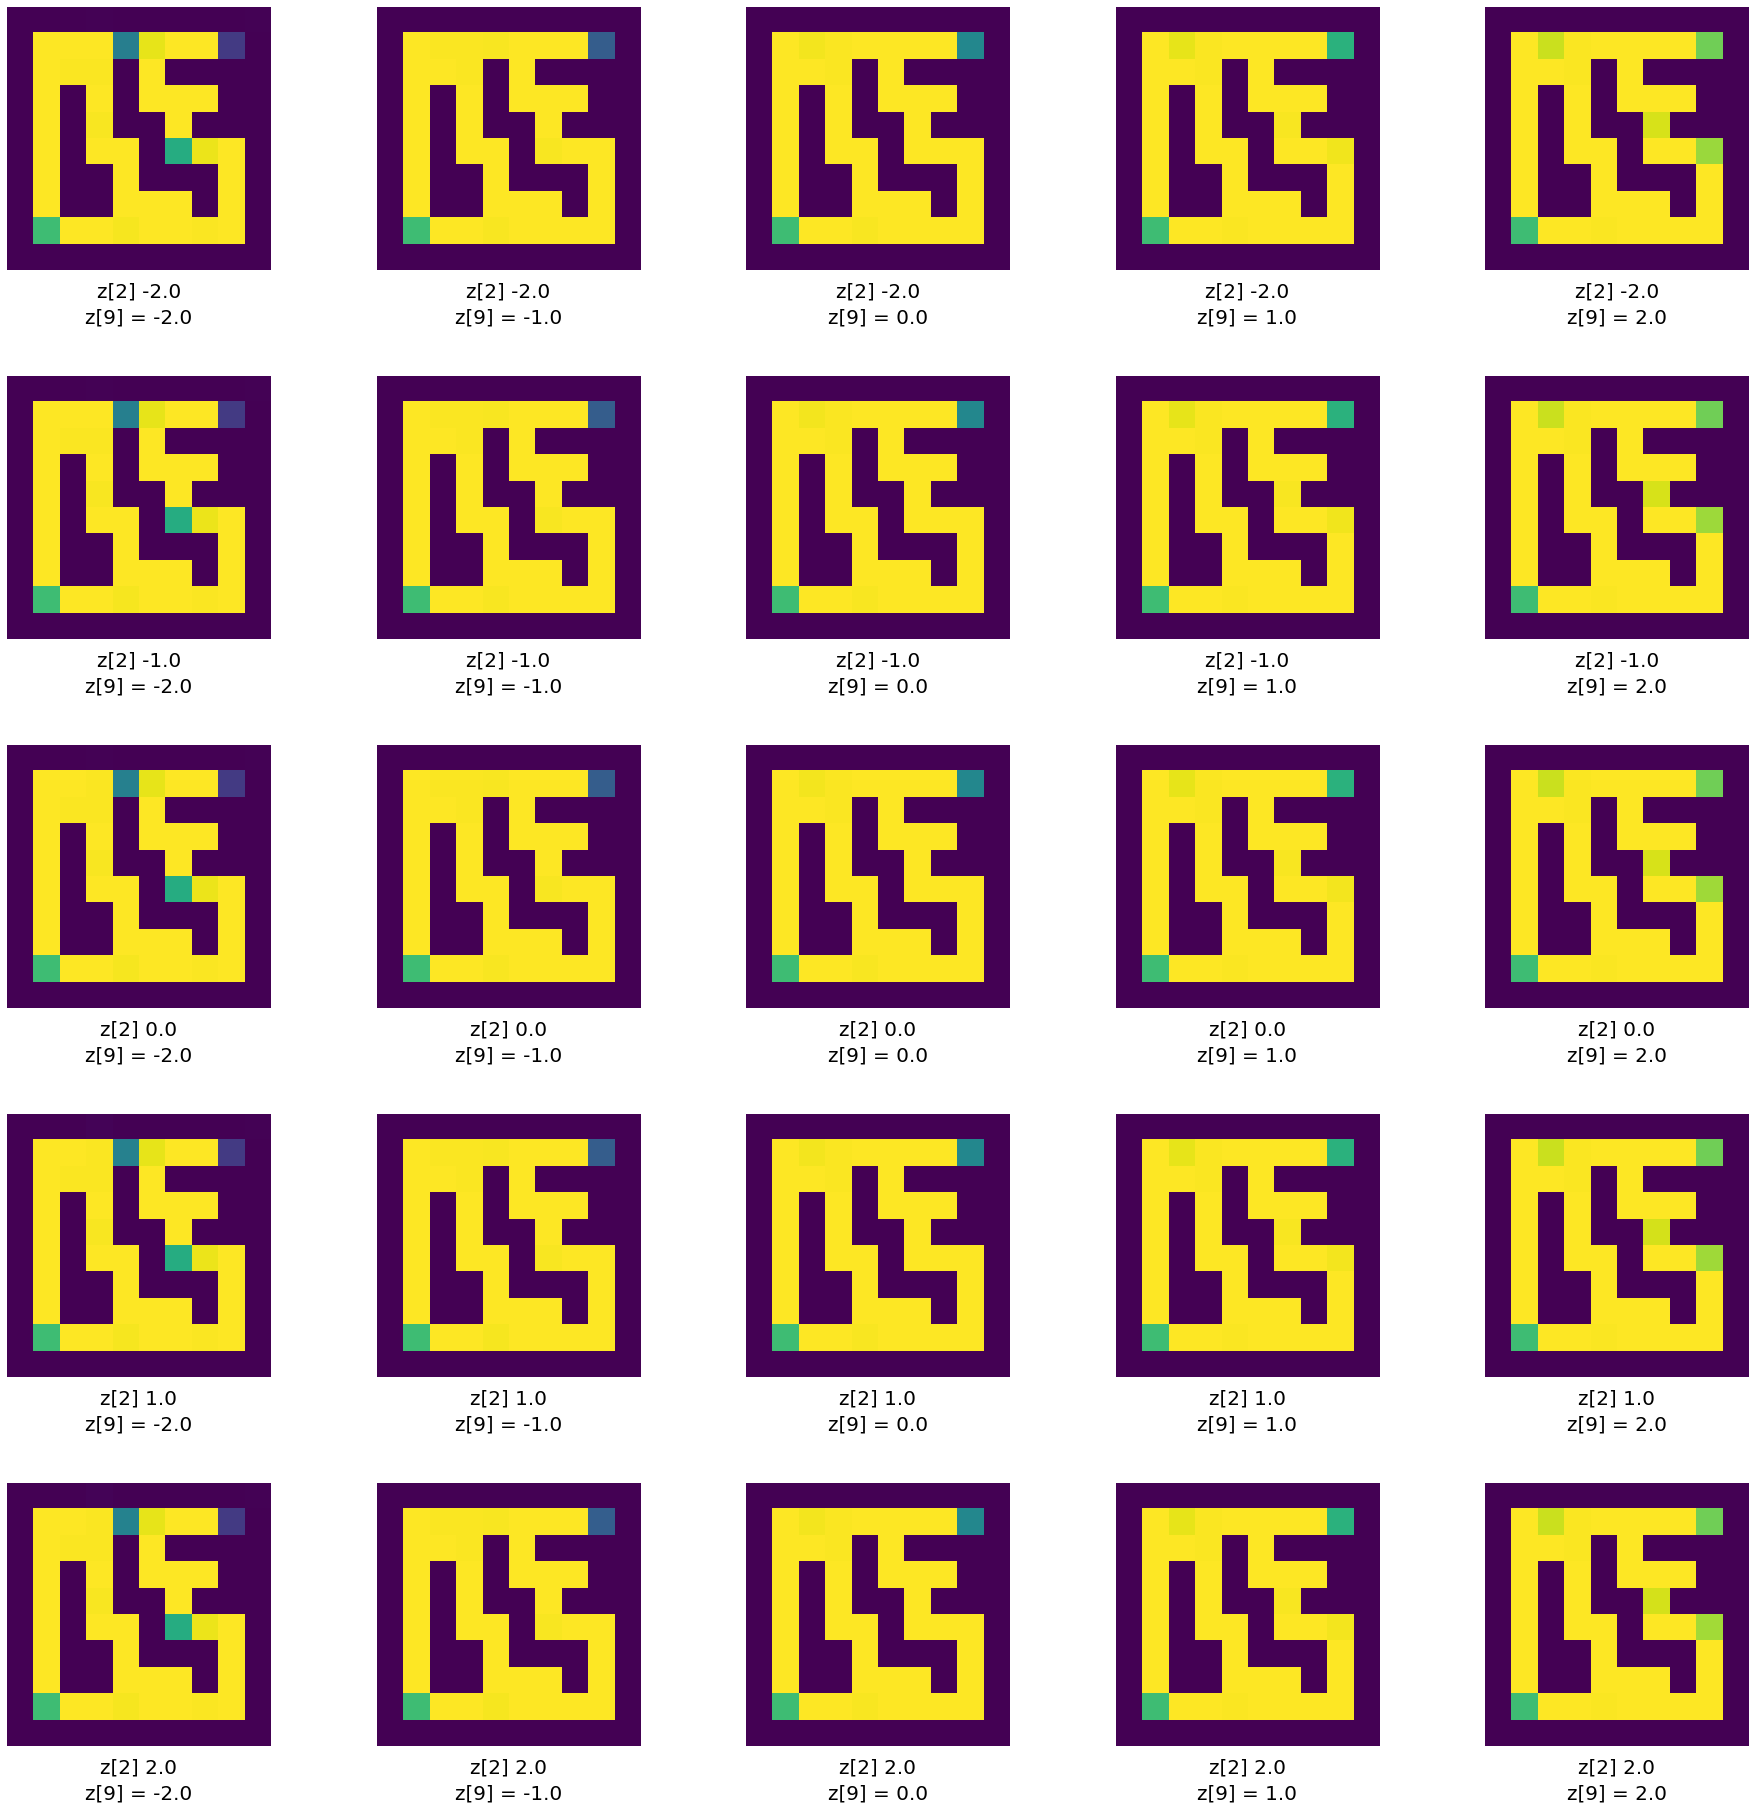

In [ ]:
top_left = vae1.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae1.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae1.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae1.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[2] = (x-2)
        z[9] = (y-2)
        
        decoded_obs = vae1.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs[:,:,0])
        
        axes[x,y].text(0.5,-0.1, 'z[2] ' + str(np.round(z[2],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[9] = ' + str(np.round(z[9],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

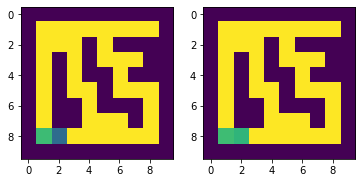

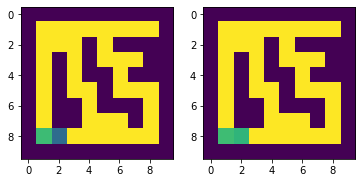

In [ ]:
from vae.arch_custommazelightz32k3conv1 import VAE
vae1 = VAE()
vae1.set_weights('./vae/vae_weights/weights_custommaze_light5000.10z32k3conv1r10000.ckpt')
file = os.listdir(DIR_NAME)[20]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[364]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)
print(obs.shape)
z_decoded1 = vae1.full_model.predict(np.array([obs]))[0]
print(z_decoded1.shape)
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded1[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

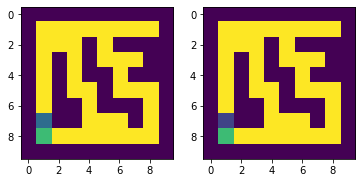

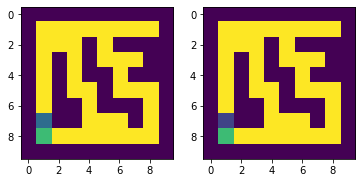

In [ ]:
file = os.listdir(DIR_NAME)[60]#あるエピソード取り出す

obs_data3 = np.load(DIR_NAME + file)['obs']#あるエピソードの観測データを取り出す(300,64,64,3)
obs = obs_data3[178]#あるエピソードの１時間ステップの観測データを取り出す(1,64,64,3)

z_decoded3 = vae1.full_model.predict(np.array([obs]))[0]
    
plt.subplot(121)
plt.imshow( obs[:,:,0])
plt.subplot(122)
plt.imshow( z_decoded3[:,:,0])
    
#     plt.show()
display.clear_output(wait=True)
display.display(plt.gcf()) 

In [ ]:
DIR_NAME = './data/custom2dmaze_light1/'
file = os.listdir(DIR_NAME)[5]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

161858515.npz
(1000, 10, 10, 1)


In [ ]:
obs = obs_data[0]

In [ ]:
mus, log_vars, _  = vae1.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

mu = [-0.1151  0.0052 -0.0092 -0.0585 -2.297  -0.0065 -0.0078  0.0054 -0.0443
 -0.0073  0.0012 -0.0045  0.0035 -0.0113  0.0197  0.001   0.0501  0.0098
  0.0027  0.0175  0.0004  0.0136  0.0705  0.12    0.2119 -0.0512 -0.009
 -0.0112 -0.014  -0.0394  0.0349 -0.0697]
log_var = [-0.9101 -0.0523 -0.0318 -0.1097 -5.0277 -0.0484 -0.0153 -0.0017 -1.1287
 -0.0062 -0.8088  0.0027 -0.0022  0.0034 -0.0384 -0.0162 -0.0511 -0.0036
 -0.1809  0.0016 -0.0052 -0.9869 -0.0867 -1.2198 -0.4585 -0.1994  0.0045
 -0.7564 -0.008  -0.1676 -0.0611 -0.1827]


z = [[ 0.0259  1.0118  0.183  -1.2164 -2.1983 -1.1778 -0.6811  0.7136  0.0969
  -0.2853  0.3589 -1.0282  0.749  -0.7511 -1.0825  0.0482 -1.0136  1.3029
  -0.7632 -0.0026 -0.8951 -0.5023  0.5988 -0.1928 -0.1535 -0.0528 -0.4211
   0.1828 -0.874  -1.0154 -0.4684  0.3843]]
informative dimensions:


array([ 0,  3,  4,  8, 10, 18, 21, 23, 24, 25, 27, 29, 31])

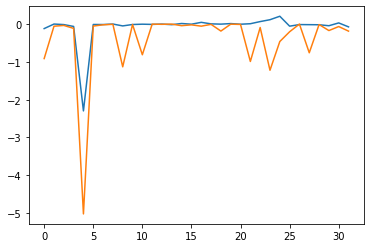

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1

In [ ]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

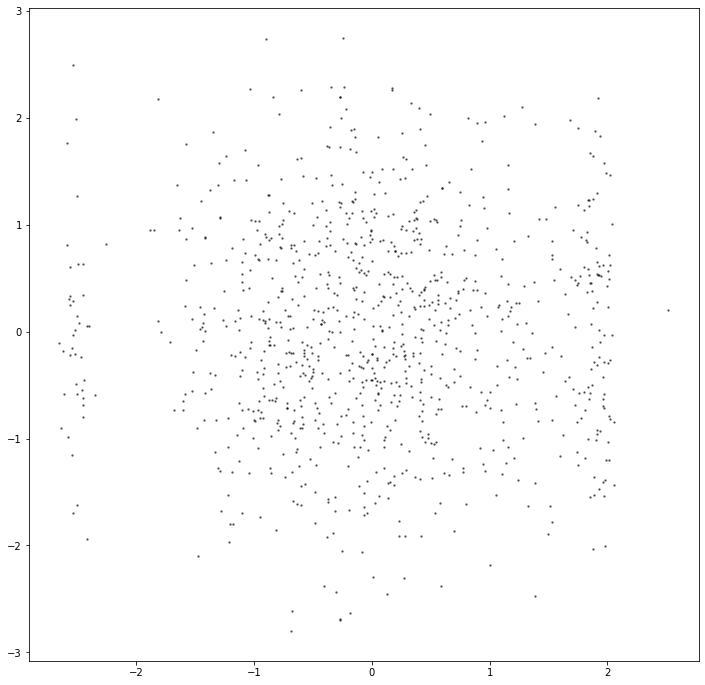

In [ ]:
n_to_show = 1000
figsize = 12
index1=0
index2=15

example_idx = np.random.choice(range(len(obs_data)), n_to_show)
example_images = obs_data[example_idx]
# example_labels = y_test[example_idx]

_,_,z_points = vae1.encoder.predict(np.array(example_images))

min_x = min(z_points[:, index1])
max_x = max(z_points[:, index1])
min_y = min(z_points[:, index2])
max_y = max(z_points[:, index2])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)
plt.show()

In [ ]:
encoded_z = vae1.encoder.predict(np.array([obs]))[2]
encoded_z= np.tile(encoded_z, (7, 1))
print("z = " + str(encoded_z))

z = [[-0.3752 -0.5664 -0.369  -0.0051 -2.2698 -1.4801  0.0212 -0.6045 -0.0162
   1.4463 -0.329  -1.0975 -0.0169  0.1309 -0.251  -0.6185  0.322   0.085
  -0.4529 -0.9652 -0.6357 -0.4736 -0.5564 -0.2964  1.0692  0.0153  1.6477
   0.6756 -0.6667 -0.5954  1.6216 -0.3215]
 [-0.3752 -0.5664 -0.369  -0.0051 -2.2698 -1.4801  0.0212 -0.6045 -0.0162
   1.4463 -0.329  -1.0975 -0.0169  0.1309 -0.251  -0.6185  0.322   0.085
  -0.4529 -0.9652 -0.6357 -0.4736 -0.5564 -0.2964  1.0692  0.0153  1.6477
   0.6756 -0.6667 -0.5954  1.6216 -0.3215]
 [-0.3752 -0.5664 -0.369  -0.0051 -2.2698 -1.4801  0.0212 -0.6045 -0.0162
   1.4463 -0.329  -1.0975 -0.0169  0.1309 -0.251  -0.6185  0.322   0.085
  -0.4529 -0.9652 -0.6357 -0.4736 -0.5564 -0.2964  1.0692  0.0153  1.6477
   0.6756 -0.6667 -0.5954  1.6216 -0.3215]
 [-0.3752 -0.5664 -0.369  -0.0051 -2.2698 -1.4801  0.0212 -0.6045 -0.0162
   1.4463 -0.329  -1.0975 -0.0169  0.1309 -0.251  -0.6185  0.322   0.085
  -0.4529 -0.9652 -0.6357 -0.4736 -0.5564 -0.2964  1.0692

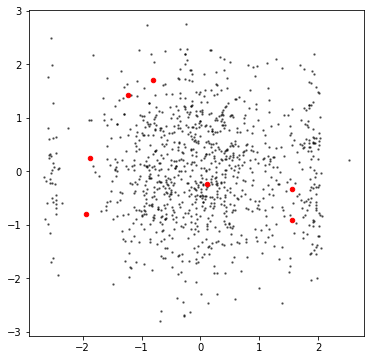

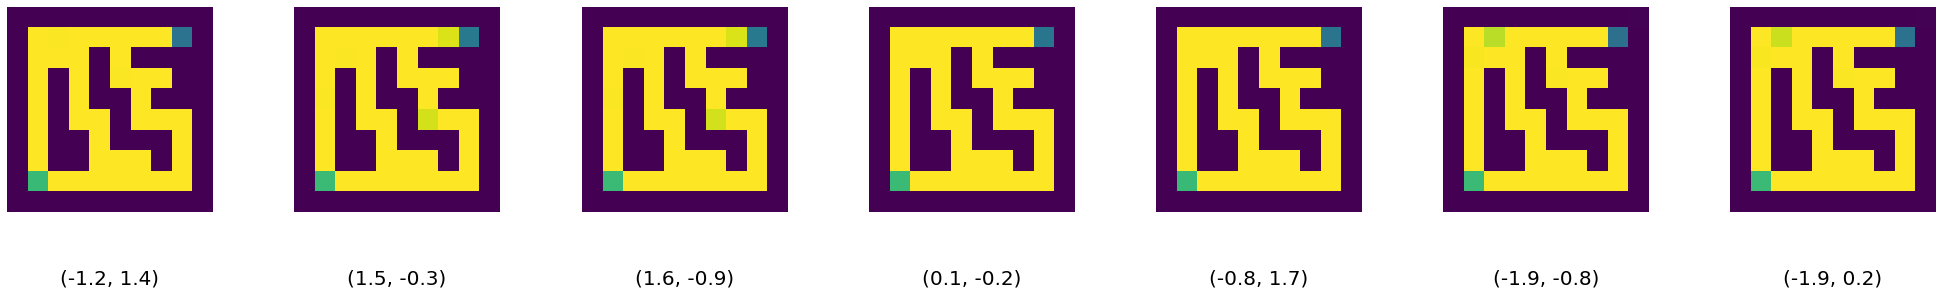

In [ ]:
figsize = 6
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, index1] , z_points[:, index2], c='black', alpha=0.5, s=2)


grid_size = 10
grid_depth = 1
figsize = 6
figsize1 = 50
batchsize = 7
# z_grid = np.array([z for z in np.random.normal(size=(batchsize,16))])
# z_grid = 
for j in range(batchsize):
    
    encoded_z[j,index1] = np.random.normal()
    encoded_z[j,index2] = np.random.normal()
# x = np.random.normal(size = grid_size * grid_depth)
# y = np.random.normal(size = grid_size * grid_depth)

# z_grid = np.array(list(zip(x, y)))
# reconst = vae1.decoder.predict(z_grid)
reconst = vae1.decoder.predict(encoded_z)
plt.scatter(encoded_z[:, index1] , encoded_z[:, index2], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize1, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(batchsize):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str((np.round(encoded_z[i,index1],1),np.round(encoded_z[i,index2],1))), fontsize=20, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0])

In [ ]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z8 = sample_z[8]
                ,z10 = sample_z[10]
                ,z13 = sample_z[13]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z26= sample_z[26]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[8] = z8
    z[10] = z10
    z[13] = z13
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[26] = z26
    z[27] = z27
    
    decoded_obs = vae1.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [ ]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z8=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z13=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z26=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-0.7293716073036194, description='z0', max=3.0, min=-3.0), FloatSlider…

<function __main__.play_with_z(z0=-0.7293716, z2=-1.5487323, z4=0.03945683, z5=-0.81787795, z6=0.71974146, z7=0.9768293, z8=0.714299, z10=-0.65156126, z13=-1.3383039, z15=0.9658649, z24=0.70276463, z25=-0.46953642, z26=0.21323122, z27=-0.19417028)>

In [ ]:
vae.full_model.summary()

Model: "vae_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Model)              [(None, 32), (None, 32),  264032    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         1851939   
Total params: 2,115,971
Trainable params: 2,115,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mus, log_vars, _  = vae2.encoder.predict(np.array([obs]))#特定の観測　(1, 64, 64, 3)を与える
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae2.encoder.predict(np.array([obs]))[2]
print("z = " + str(encoded_z))

mu = [-0.017   1.0687  0.0068 -0.0073 -0.0004 -0.0213  0.0033  0.024   0.0079
  0.0035 -0.0131  0.0011 -0.015  -0.0092  0.0047  0.0038 -0.0126 -0.0023
  0.0115 -0.0105  0.0001 -0.8742 -0.0073 -0.0113 -0.0019 -0.009   0.0036
 -0.0084 -0.0062 -0.0101  0.0079 -0.0058]
log_var = [-0.005  -3.2656  0.0012 -0.0064 -0.0832 -0.0067  0.0038  0.0007 -0.0115
  0.0037  0.0165 -0.0034 -0.004  -0.0111 -0.0069 -0.0027 -0.0044  0.0076
 -0.0005 -0.1436  0.0058 -0.9116  0.0098 -0.0025  0.0009  0.006  -0.0126
 -0.0026 -0.0077 -0.0043 -0.0074  0.0064]
z = [[ 0.7776  1.1109 -0.3628 -0.4584  1.5002  1.0793 -1.1028  0.5392 -0.3817
  -0.1768 -0.961  -1.1162 -1.0017  0.8331  0.1124 -0.7831  0.4714 -1.2231
   1.0771  0.4763  1.2822 -1.8684  0.513  -2.0841  0.3737 -0.3046  0.1204
   0.726   1.7934  0.2073  0.259  -0.0664]]


informative dimensions:


array([ 1, 19, 21])

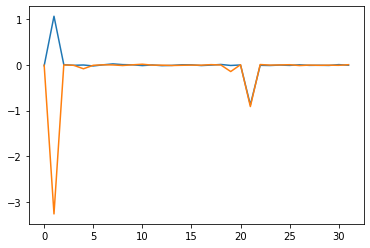

In [ ]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs1 = np.where(abs(log_var) > 0.1)[0]
hot_zs1